In [131]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt 

X_train = np.array([1, 2, 3, 4, 5, 6, 7, 8]).reshape(-1, 1)
y_train = [0, 0, 0, 0, 1, 1, 1, 1]

model = LogisticRegression()  # default regularization: l2
model.fit(X_train, y_train)

model.predict([[5]])

array([1])

In [132]:
# class probabilities for each point
X = np.linspace(0, 9, 100).reshape(-1, 1)
y_prob = model.predict_proba(X)

y_prob

array([[0.99485263, 0.00514737],
       [0.99427836, 0.00572164],
       [0.99364045, 0.00635955],
       [0.99293191, 0.00706809],
       [0.99214506, 0.00785494],
       [0.99127138, 0.00872862],
       [0.99030147, 0.00969853],
       [0.98922497, 0.01077503],
       [0.98803042, 0.01196958],
       [0.98670521, 0.01329479],
       [0.98523548, 0.01476452],
       [0.98360598, 0.01639402],
       [0.98179995, 0.01820005],
       [0.97979905, 0.02020095],
       [0.97758319, 0.02241681],
       [0.97513045, 0.02486955],
       [0.97241691, 0.02758309],
       [0.96941657, 0.03058343],
       [0.96610126, 0.03389874],
       [0.96244048, 0.03755952],
       [0.95840139, 0.04159861],
       [0.95394873, 0.04605127],
       [0.9490448 , 0.0509552 ],
       [0.9436495 , 0.0563505 ],
       [0.93772043, 0.06227957],
       [0.93121298, 0.06878702],
       [0.92408064, 0.07591936],
       [0.91627525, 0.08372475],
       [0.90774749, 0.09225251],
       [0.89844741, 0.10155259],
       [0.

(0.0, 10.0)

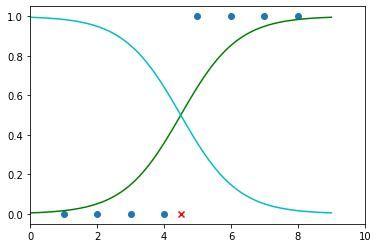

In [133]:
plt.scatter( X_train, y_train)

plt.plot(X, y_prob[:, 1], color='g')
plt.plot(X, y_prob[:, 0], color='c')

# plotting the decision boundary (a point)
# ax + b = 0 -> x = -b/a
plt.scatter(- model.intercept_/model.coef_, 0, marker='x', color='r')
plt.xlim(0, 10)

#### Withhout regularization

(0.0, 10.0)

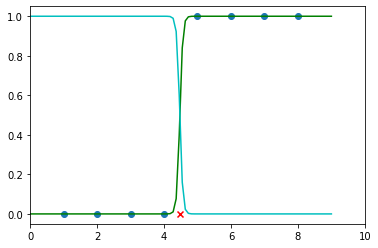

In [134]:
model = LogisticRegression(penalty='none')
model.fit(X_train, y_train)
y_prob = model.predict_proba(X)

plt.scatter( X_train, y_train)

plt.plot(X, y_prob[:, 1], color='g')
plt.plot(X, y_prob[:, 0], color='c')

# plotting the decision boundary (a point)
# ax + b = 0 -> x = -b/a
plt.scatter(- model.intercept_/model.coef_, 0, marker='x', color='r')

plt.xlim(0, 10)

#### With Two features (predictors)

In [135]:
X_train = np.array(np.array([[1, 2], [2, 2], [2, 1], [3, 4], [4, 4], [4, 3]]))
y_train = [0, 0, 0, 1, 1, 1]

model = LogisticRegression() 
model.fit(X_train, y_train)

model.predict([[1, 1]])

array([0])

In [136]:
X = list(zip(np.linspace(0, 5, 100), np.linspace(0, 5, 100)))
y_prob = model.predict_proba(X)

In [137]:
import pandas as pd
df = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis=1)
df.columns = ['feat1', 'feat2', 'y']

df

,feat1,feat2,y
0,1,2,0
1,2,2,0
2,2,1,0
3,3,4,1
4,4,4,1
5,4,3,1


In [138]:
model.coef_

array([[0.86834805, 0.86834805]])

In [139]:
model.intercept_

array([-4.63291466])

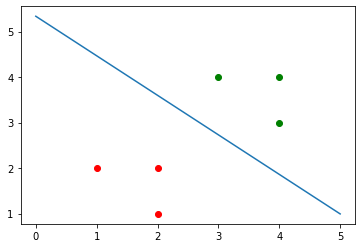

In [140]:
plt.scatter( df.loc[df.y == 0].feat1, df.loc[df.y == 0].feat2, color='r')
plt.scatter( df.loc[df.y == 1].feat1, df.loc[df.y == 1].feat2, color='g')


# decision boundary line 
# a * x_1 + b * x_2 + c = 0
# x_2 = - (a * x_1 + c / b)
def f_x(x1):
  return - (model.coef_[0][0] * x1 + model.intercept_ / model.coef_[0][1])


plt.plot([0, 5], [f_x(0), f_x(5)])

## Softmax

In [141]:
X_train = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]).reshape(-1, 1)
y_train = [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2]

model = LogisticRegression(
  multi_class='multinomial'
)
model.fit(X_train, y_train)

model.predict([[9.5]])

array([2])

In [142]:
X = np.linspace(0, 13, 100).reshape(-1, 1)
y_prob = model.predict_proba(X)

In [143]:
# there are three separate lines
model.coef_

array([[-1.15375574e+00],
       [ 5.76411974e-06],
       [ 1.15374998e+00]])

In [144]:
model.intercept_

array([ 6.74004088,  1.51866749, -8.25870837])

(0.0, 13.0)

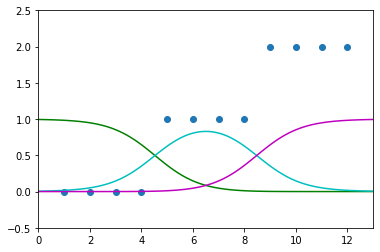

In [33]:
plt.scatter(X_train, y_train)

plt.plot(X, y_prob[:, 0], color='g')
plt.plot(X, y_prob[:, 1], color='c')
plt.plot(X, y_prob[:, 2], color='m')


plt.ylim(-0.5, 2.5)
plt.xlim(0, 13)